In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.graph import route_through_array
import cmcrameri.cm as cmc
sns.set_theme(style="white");



def load_data(filename):
    data = []
    with open(filename, 'r') as ff:
        line = [int(x) for x in ff.readline()[:-1]]
        while line:
            data.append(line)
            line = [int(x) for x in ff.readline()[:-1]]
    return np.array(data)

def load_data2(filename):
    img = load_data(filename)

    grids = []
    for i in range(5):
        nova = img+i
        grids.append(nova//10 + nova%10)
    hgrids = np.hstack(grids)

    vgrids = []
    for i in range(5):
        novica = hgrids + i
        vgrids.append(novica//10 + novica%10)

    return np.vstack(vgrids)

def part1(filename, load_func=load_data):
    img = load_func(filename)
    ruta, trosak = route_through_array(img, [0, 0], [-1, -1], fully_connected=False, geometric=False)
    # The result
    return int(trosak - img[0, 0])

def part2(filename):
    return part1(filename, load_func=load_data2)

In [7]:
cmap = cmc.batlow_r

In [2]:
# filename = "./data/day15test.txt"
filename = "./data/day15a.txt"        

In [3]:
# PART 1
part1(filename)

824

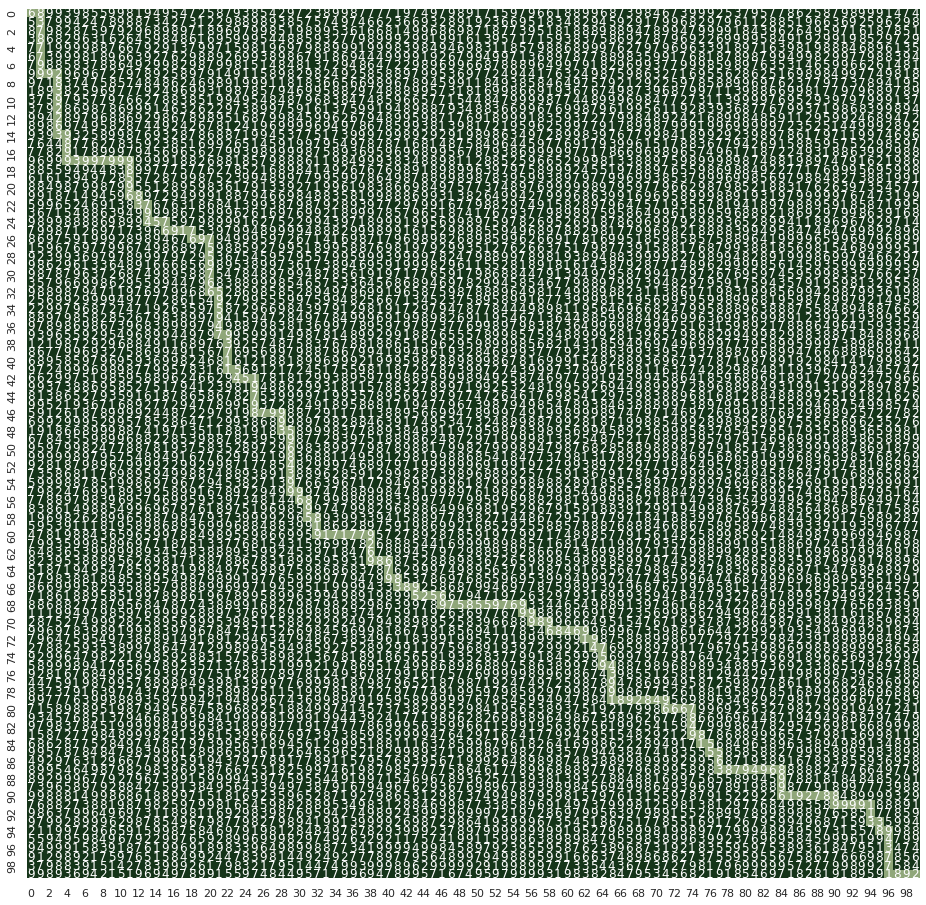

In [5]:
# Visualisation:
img = load_data(filename)
ruta, trosak = route_through_array(img, [0, 0], [-1, -1], fully_connected=False)
pp = np.array(ruta)
maska = np.zeros_like(img)
maska[pp[:,1], pp[:,0]] = 10
plt.figure(figsize=(16, 16))
sns.heatmap(maska, cbar=False)
sns.heatmap(img, annot=True, alpha=0.5, cmap=plt.get_cmap("PiYG", 1), cbar=False);

## part 2

In [9]:
part2(filename)

3063

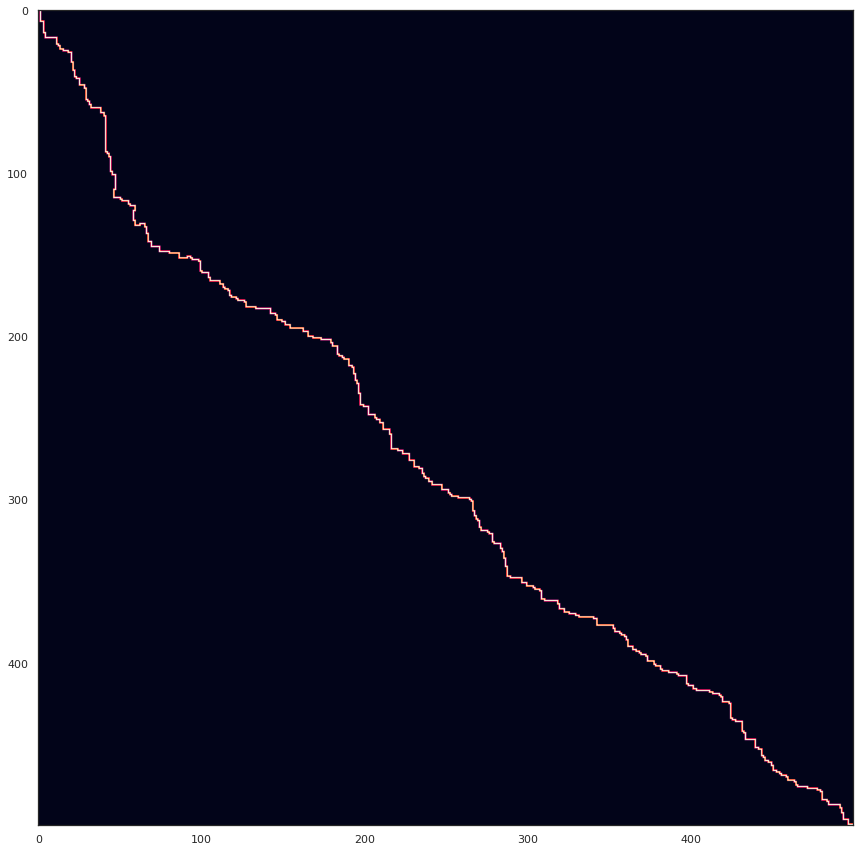

In [9]:
img = load_data2(filename)
mask = np.zeros_like(img)
ruta, trosak = route_through_array(img, [0, 0], [-1, -1], fully_connected=False)
pp = np.array(ruta)
mask.T[pp[:,0], pp[:, 1]] = 50
plt.close("all")
plt.figure(figsize=(15, 15))
if "test" in filename:
    sns.heatmap(mask, cbar=False)
    sns.heatmap(img, annot=True, alpha=0.5, cmap=plt.get_cmap("PiYG", 1), cbar=False)
    for i in range(5):
        plt.vlines(10*(i+1), 0, 50)
        plt.hlines(10*(i+1), 0, 50)
else:
    plt.imshow(mask)